# Time Complexity and Asymptotic Analysis

### Max  subarray sum

In [2]:
# First version of max_subarray sum
# from your previous homework

from random import randint
def max_subarray1(seq):
    n=len(seq)
    start,end=0,0
    max=seq[0]
    for i in range(n):
        for j in range(i,n):
            sum=0
            for k in range(i,j+1):
                sum+=seq[k]
            if sum >max:
                start,end=i,j
                max=sum
    return max,start,end


### Complexity

- **First note** that does not stop early under any condition
- So the first/best/average case complexity is the same
- There are 3 nested loops:
    - $0\le i < n$  **exactly** $n$ times
    - $i\le j< n$   **at most** $n$ times
    - $i\le k\le j$ **at most** $n$ times
- Since there is constant work inside the $k$ loop the complexity os bounded from above by $n\cdot n\cdot n$.
    - i.e. $O(n^3)$
- Could it be $\Theta(n^3)$, $\Theta(n^2)$, or even $\Theta(n)$?
- In fact it is $\Theta(n^3)$. 
- For an exact derivation check the end of this document under the section **Extra**

### Second version

In [4]:
def max_subarray2(seq):
    n=len(seq)
    start,end=0,0
    max=seq[0]
    for i in range(n):
        sum=0
        for j in range(i,n):
            sum+=seq[j]
            if sum >max:
                start,end=i,j
                max=sum
    return max,start,end


### Complexity

- IT is clear that the outer loop is performed $\Theta(n)$ times.
- But the inner loops is **not** from 0 to n-1, it is from $i$ to $n-1$
- This case is simple enough to derive an exact expression
- Since the work done inside the $j$ loop is constant we can write
$$\begin{align*}
cost&=\sum_{i=0}^{n-1}\sum_{j=i}^{n-1}  C \\
     &=C\sum_{i=0}^{n-1}(n-i)=C\left[n^2-\sum_{i=0}^{n-1}i\right]=C\frac{n^2+n}{2}\\
     &=\Theta(n^2)
\end{align*}
$$

### In reality

In [5]:

import timeit as t
repeat=1
square=[]
cube=[]
xaxis=[]
for i in range(200,1400,200):
    size=i
    a=t.timeit('seq=[randint(-30,50) for i in range(size)];max_subarray1(seq)',
         setup='from __main__ import max_subarray1;from random import randint',
         number=repeat,globals=globals())
    b=t.timeit('seq=[randint(-30,50) for i in range(size)];max_subarray2(seq)',
         setup='from __main__ import max_subarray2;from random import randint',
        number=repeat,globals=globals())
    cube.append(a)
    xaxis.append(i)
    print(i)
    square.append(b)
    

200
400
600
800
1000
1200


[0.00137520000000535, 0.005511699999999564, 0.02114790000000255, 0.021264799999997308, 0.03507150000000081, 0.04731660000000204]
[0.11732210000000265, 0.5869609000000011, 2.124633600000003, 5.052306999999999, 9.749894000000005, 16.901245099999997]


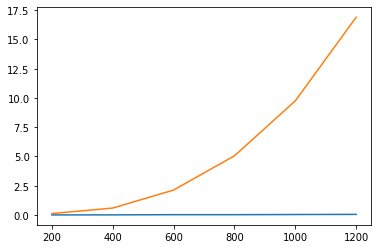

In [7]:
import matplotlib.pyplot as plt
plt.plot(xaxis,square)
plt.plot(xaxis,cube)
plt.show()

### Comparing with $n^3$

[1.4665262500000331e-08, 9.171264062500018e-09, 9.83626666666668e-09, 9.867787109374998e-09, 9.749894000000006e-09, 9.780813136574072e-09]


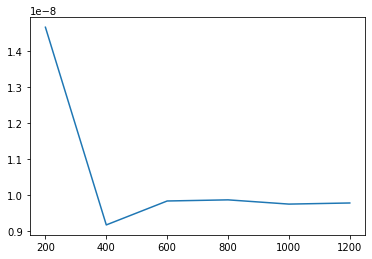

In [8]:
#print(cube[-3:])
ratio=[x/(y**3) for x,y in zip(cube,xaxis) ]
print(ratio)
plt.plot(xaxis,ratio)
plt.show()

### Comparing with $n^2$

In [19]:
import timeit as t
repeat=5
square=[]
xaxis=[]
for i in range(200,5000,200):
    size=i
    b=t.timeit('seq=[randint(-30,50) for i in range(size)];max_subarray2(seq)',
         setup='from __main__ import max_subarray2;from random import randint',
        number=repeat,globals=globals())
    xaxis.append(i)
    square.append(b)
    

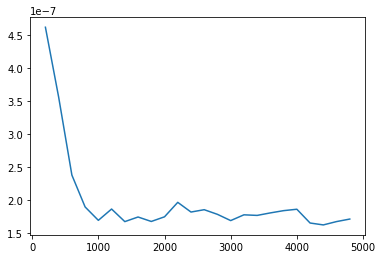

In [20]:
ratio=[x/(y**2) for x,y in zip(square,xaxis) ]
plt.plot(xaxis,ratio)

[compare](https://www.online-python.com/AkjW7gsBvI)

[1.8615877252159408e-06, 7.928348122732132e-08, 2.4538426389173966e-07, 3.092666781185471e-07, 1.3676484899770002e-07, 2.001051687532001e-07, 1.9849460000024957e-07, 1.967228933608567e-07, 2.517743746904199e-07]


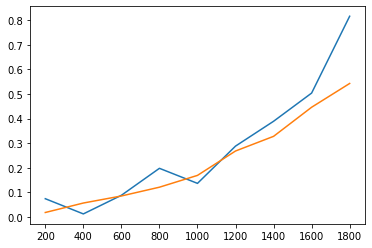

In [23]:
import matplotlib.pyplot as plt
other=[0.07446350900863763, 0.01268535699637141, 0.08833833500102628, 0.19793067399587017, 0.13676484899770003, 0.28815144300460815, 0.38904941600048915, 0.5036106070037931, 0.8157489739969606]

ratio=[x/(y**2) for x,y in zip(other,xaxis[0:len(other)])]
k=len(other)
print(ratio)
plt.plot(xaxis[0:k],other)
plt.plot(xaxis[0:k],square[0:k])
plt.show()

### Pre-run results

The above code might take some time to complete. Below is a saved result
![cube-vs-square](square-cube-max-subarray.png)

### Logarithms

- One way to raise a number $x$ to the power $n$ 
- $x^n=x*x*\ldots *x$ where the product is done $n-1$ times
- Clearly the above is $\Theta(n)$
- When $n$ is a a power of 2, i.e. $n=2^k$ (for simplicity but this method can be generalized for any $n$)
- We can write $x^n=x^{2^k}=\left(\left(\left(x^2\right)^2\right)^{2}\right)^{\ldots}$
- Using that fact we write the algorithm below

       

In [46]:
from math import log2
def power(x,n):
    i=n
    p=x
    while i>1:
        p=p*p
        i//=2
    return p

x=2
n=16
print(power(x,n),x**n)

65536 65536


### Analysis

- The value if $i$ doubles for every iteration therefore it stops when $i=2^k>n$ for some $k$
- Therefore it stops when the number of iterations is $k>\log n$
- Thus the complexity of the above algorithm is $\Theta(\log n)$

In [ ]:
def power_set(seq):
    p=[[]]         #power set always contains the empty set
    n=len(seq)
    for i in range(n):
        toadd=[]
        for s in p:          # to add has the same size as p
            new=s+[seq[i]]
            toadd.append(new)
        p=p+toadd            # p doubles in size after each i iteration
    return p  
s=['a','b','c','d']
p=power_set(s)
print(p)

### Binary search



In [66]:
from random import randint
def bsearch(seq,x):
    start,end=0,len(seq)-1
    count=0
    while start<=end:
        count+=1
        mid=(start+end)//2
        if seq[mid]==x:
            return mid,count
        elif seq[mid]>x:
            end=mid-1
        else:
            start=mid+1
    return None,count
n=50
seq=[randint(1,100) for i in range(n)]
seq.sort()
x=1000
r=bsearch(seq,x)
print(r)      

(None, 6)


### Analyis

- In worst case the element is not found
- It means the while loop exist when end>start
- It means at the penultimate iteration end==start or the interval size is 1
- Since at every iteration the interval is halved 
- We ask how many times is n is halved to reach 1? $\log_2(n)+1$

In [67]:
from math import log2
n=len(seq)
int(log2(n))+1

6